# 1. 라이브러리 설치하기

In [2]:
pip install fbprophet

# 2. 구글 드라이브 마운트하기

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=9129292

Enter your authorization code:
··········
Mounted at /content/drive


# 3. 데이터셋 경로와 예측 기간 입력하기

In [38]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')


google_drive_path = "/content/drive/My Drive/sales.csv"  #@param {type:"string"}
future_periods = 140 #@param {type:"integer"}


### 데이터셋 양식
date, sales_count 컬럼이 포함된 csv 파일 

### 데이터셋 업로드
구글드라이브 파일 접근 권한을 Colab에 부여한 후, 구들드라이브에 학습데이터 셋을 업로드해야 함
그리고 해당 경로를 입력해야함

### 샘플 파일 
https://github.com/americanomin/prophet-colab/blob/master/data/sales.csv

# 4. 데이터셋 불러오기

In [39]:
sales_df = pd.read_csv(google_drive_path, index_col='date', parse_dates=True)
df = pd.read_csv(google_drive_path)

df=df.rename(columns={'date':'ds', 'sales_count':'y'})
# prophet에서는 ds, y 컬럼으로 시계열 데이터를 분석하기 때문에, df 컬럼명을 변경해야한다.

# 5. 데이터셋 살펴보기

In [40]:
sales_df.head()

,sales_count
date,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


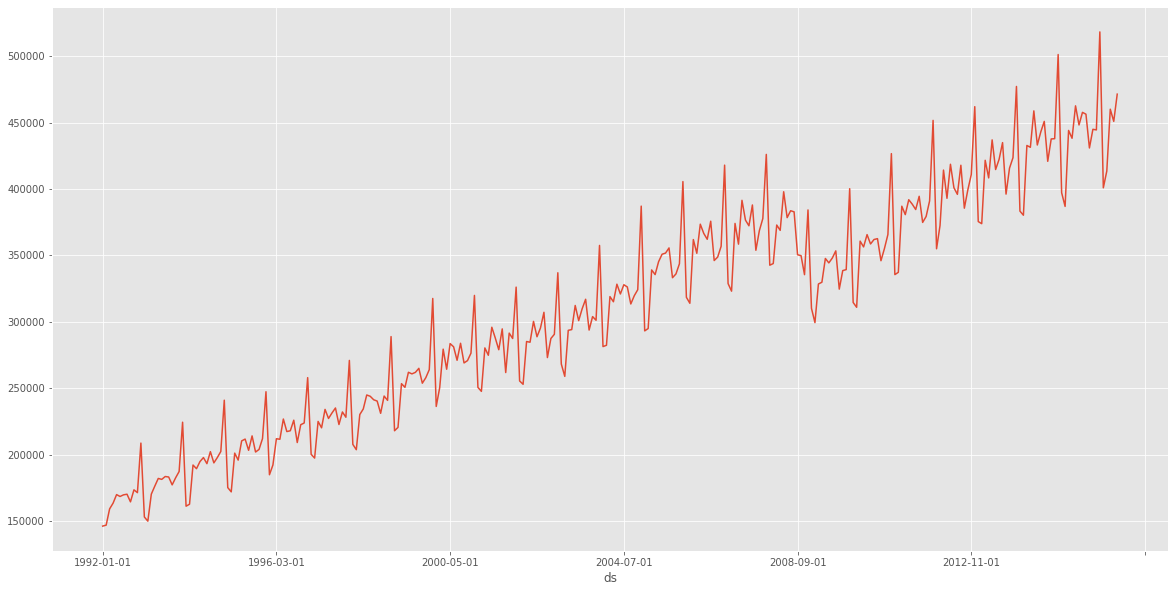

In [41]:
df.set_index('ds').y.plot()

# 6. 주문량 예측하기

In [42]:
df['y'] = np.log(df['y'])

model = Prophet()
model.fit(df);

# period에는 예측하고 싶은 기간 입력
future = model.make_future_dataframe(periods=future_periods, freq = 'd')

forecast = model.predict(future)

df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

sales_df.index = pd.to_datetime(sales_df.index) #make sure our index as a datetime object
connect_date = sales_df.index[-2] #select the 2nd to last date

mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

viz_df = sales_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 7. 예측 결과 확인하기

Text(0.5, 0, 'date')

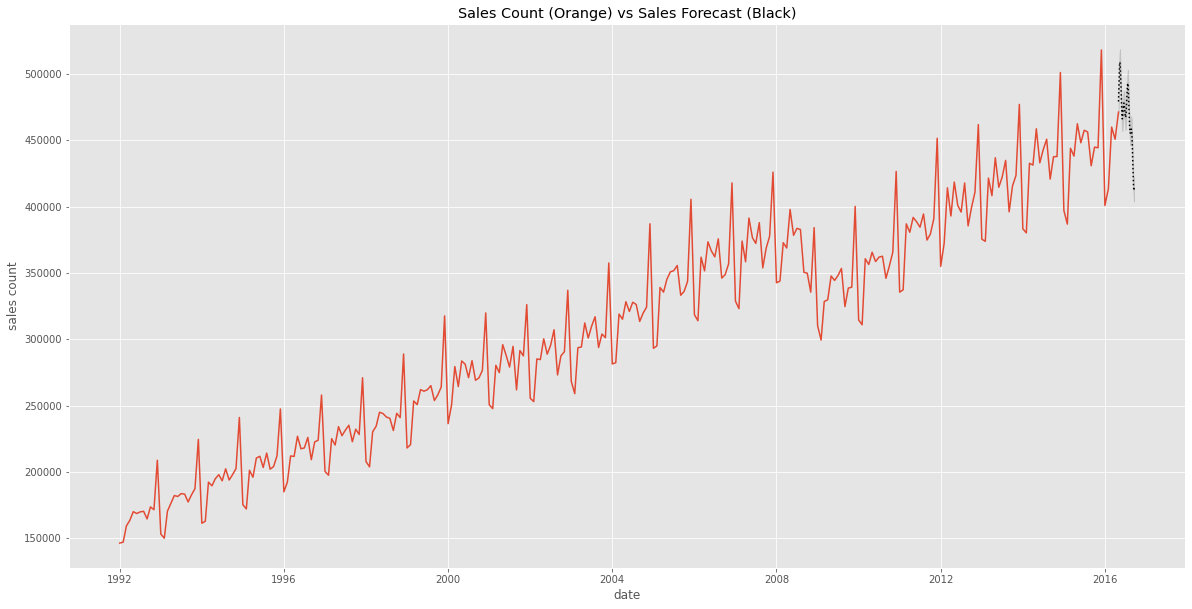

In [33]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.sales_count)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Sales Count (Orange) vs Sales Forecast (Black)')
ax1.set_ylabel('sales count')
ax1.set_xlabel('date')